In [32]:
import numpy as np 
import pandas as pd
import numpy.random as rn
import matplotlib.pyplot as plt 
import seaborn as sns

<div style="text-align: center;"> 

# Naive Bayes Classifier and Gaussians

## Amanda Kube Jotte - University of Chicago
## Data 22100

    
    
<img
  src="https://raw.githubusercontent.com/amandakube/Data118LectureImages/main/UChicago_DSI.png"
  alt="UC-DSI"
  style="display:block; margin: 1em auto;"
  width="500"
  height="600">
    
</div>




## Symptoms of sleep deprivation



In [34]:
# Sleep deprivation symptoms and class (Yes/No sleep deprived data): 
sleep_dep_df = pd.DataFrame({
    'Slowed thinking': [
        'Mild',   'None', 'None',   'None',   'None',   'None',   'Severe', 'Mild',   'Severe', 'None', 
        'None',   'None', 'Severe', 'Severe', 'Severe', 'Mild',   'Mild',   'Mild',   'Severe', 'None',
        'Severe', 'None', 'Mild',   'None',   'None',   'Severe', 'Mild',   'None',   'Mild',   'Severe', 
        'None',   'None', 'Severe', 'Severe', 'Mild',   'None',   'Severe', 'Mild',   'Severe', 'None', 
        'Mild',   'None', 'Severe', 'Severe', 'None',   'None',   'None',   'Severe', 'Mild',   'None'
    ], 
    'Reduced attention span': [
        'None',   'Severe', 'Mild',   'None',   'Severe', 'Severe', 'None',   'None',   'None',   'Mild',
        'Severe', 'None',   'Mild',   'Severe', 'None',   'Severe', 'Severe', 'Severe', 'None',   'Severe',
        'Mild',   'None',   'Severe', 'Mild',   'Mild',   'Severe', 'Mild',   'None',   'Severe', 'None', 
        'None',   'Mild',   'Severe', 'None',   'Severe', 'None',   'Severe', 'Severe', 'Severe', 'Severe', 
        'Severe', 'None',   'Mild',   'None',   'Severe', 'Severe', 'None',   'Mild',   'Mild',   'None'
    ],
    'Worsened memory': [
        'Mild',   'Mild',   'None',   'Mild',   'None',   'Mild',  'Severe',  'Severe', 'Mild',   'Mild', 
        'Severe', 'Mild',   'Severe', 'None',   'Mild',   'None',  'Severe',  'None',   'None',   'Mild',
        'None',   'None',   'Mild',   'Severe', 'Severe', 'Mild',  'Mild',    'Severe', 'Severe', 'Mild', 
        'Severe', 'Severe', 'Mild',   'Severe', 'Severe', 'None',  'Severe',  'Severe', 'None',   'None', 
        'None',   'Mild',   'None',   'None',   'None',   'Severe', 'Severe', 'Mild',   'None',   'Severe'  
    ],
    'Risky decision-making': [
        'None',   'None',   'Mild', 'Severe', 'Severe', 'Mild',   'Severe', 'None',   'None',   'Severe', 
        'None',   'Severe', 'Mild', 'Severe', 'None',   'Severe', 'Severe', 'None',   'Severe', 'Mild',
        'Severe', 'None',   'None',   'Mild', 'None',   'None',   'Severe', 'None',   'None',   'Mild', 
        'Mild',   'Severe', 'Severe', 'Mild', 'None',   'Mild',   'Mild',   'None',   'Severe', 'Severe', 
        'None',   'Mild',   'Severe', 'None', 'None',   'Mild',   'Severe', 'Severe', 'None',   'Mild'  
    ],
    'Lack of energy': [
        'None',   'Severe', 'Mild',   'Mild',  'Severe', 'None',   'Severe', 'Mild',   'Severe', 'None', 
        'Mild',   'None',   'Severe', 'Severe','None',   'Mild',   'None',   'Severe', 'Severe', 'Severe',
        'None',   'Severe', 'Mild',   'None',  'Severe', 'Severe', 'None',   'Mild',   'Severe', 'Mild', 
        'Severe', 'None',   'Mild',   'None',  'Mild',   'None',   'Mild',   'None',   'Mild',  'Severe', 
        'None',   'Severe', 'Severe', 'Mild', 'Severe',  'Severe', 'Severe', 'Severe', 'Severe', 'Severe'  
    ],
    'Mood changes': [
        'Severe', 'None',   'Severe', 'Mild',   'Severe', 'Mild',   'Severe', 'Mild', 'None',   'None', 
        'Mild',   'Severe', 'None',   'Severe', 'None',   'None',   'Mild',   'None', 'Mild',   'Mild',
        'None',   'Mild',   'None',   'Mild',   'Severe', 'Mild',   'None',   'Mild', 'None',   'None', 
        'None',   'Mild',   'Mild',   'None',   'None',   'None',   'None',   'None', 'Severe', 'None', 
        'None',   'None',   'None',   'Mild',   'Severe', 'Severe', 'Mild',   'Mild', 'None',   'None'
    ],
    'Sleep Deprived': ['No',  'No', 'No', 'No', 'Yes', 'No',  'Yes', 'Yes', 'Yes', 'No', 
                       'Yes', 'No', 'Yes', 'Yes', 'No',  'Yes', 'No',  'No',  'Yes', 'Yes',
                       'No',  'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No',  'Yes', 'Yes',
                       'Yes',  'Yes', 'Yes', 'No', 'Yes', 'No',  'Yes', 'No',  'Yes', 'Yes', 
                       'No',  'No',  'Yes', 'No',  'No', 'Yes', 'Yes', 'Yes', 'No',  'Yes'
                      ]
})

sleep_dep_df.head()



,Slowed thinking,Reduced attention span,Worsened memory,Risky decision-making,Lack of energy,Mood changes,Sleep Deprived
0,Mild,None,Mild,None,None,Severe,No
1,None,Severe,Mild,None,Severe,None,No
2,None,Mild,None,Mild,Mild,Severe,No
3,None,None,Mild,Severe,Mild,Mild,No
4,None,Severe,None,Severe,Severe,Severe,Yes


## New person comes along with a list of symptoms. Are they sleep deprived?

### We want a model for *conditional probabilities* 

I.e., the probability of being sleep deprived **given** the symptoms: 

$${\large P_\theta(\text{Sleep Deprived} \mid symptom_1, symptom_2, symptom_3, \dots)}$$

* The model has **parameters** $\theta$
* The symptoms are the **features**
* Sleep Deprived is the **discrete label** (that we wish to predict)


### Naive Bayes classifiers begin with Bayes rule...
${P_\theta(\text{Sleep Deprived} \mid symptom_1, symptom_2, symptom_3, \dots) \overbrace{=}^{\text{Bayes}} }$

</br> 


$$ \frac{\overbrace{P_\theta( symptom_1, symptom_2, symptom_3, \dots \mid \text{Sleep Deprived})}^{\text{"class conditional probability"}} \, \, P_\theta(\text{Sleep Deprived})}{P_\theta(symptom_1, symptom_2, symptom_3,\dots)}$$

<br>

### The main assumption: features are **conditionally independent** given the label. 
**Note:** This assumption is rarely "true" in real-world situations, but often works well in practice.


${P_\theta( symptom_1, symptom_2, symptom_3, \dots \mid \text{Sleep Deprived}) } $

$${= \prod_j P_\theta(symptom_j \mid \text{Sleep Deprived})}$$

**Note:** Different types of naive Bayes classifiers differ mainly assuming different distributions for the conditional probabilities, $P_\theta(symptom_j \mid \text{Sleep Deprived})$. 

### Why does this assumption help? Makes learning easy...

Think about the terms we need to compute $P_\theta(\text{Sleep Deprived} \mid symptom_1, symptom_2, symptom_3, \dots)$:

*  ${\large P_\theta(\text{Sleep Deprived})}$ (base rate)
* ${\large P_\theta(symptom_j \mid \text{Sleep Deprived})}$ (class conditional probability $j$)

...what about...? 
* ${\large P_\theta(symptom_1, symptom_2, symptom_3,\dots)}$

<br>



We can compute this using **marginalization:**

$$
\begin{aligned}
P_\theta(\text{symptom}_1, \text{symptom}_2, \dots)
&= P_\theta(\text{symptom}_1, \text{symptom}_2, \dots
   \mid \text{Sleep Deprived = yes}) \\
&\quad \times P_\theta(\text{Sleep Deprived = yes}) \\
&\quad + P_\theta(\text{symptom}_1, \text{symptom}_2, \dots
   \mid \text{Sleep Deprived = no}) \\
&\quad \times P_\theta(\text{Sleep Deprived = no})
\end{aligned}
$$





<br>

...and by our independence assumption...:

$$\left[\prod_j P_\theta(symptom_j \mid  \text{Sleep Deprived = yes})\right] \, P_\theta(\text{Sleep Deprived = yes}) +\\ \,\left[\prod_j P_\theta(symptom_j \mid  \text{Sleep Deprived = no})\right]\,P_\theta(\text{Sleep Deprived = no})$$


### To summarize: we just need to learn:
*  ${\large P_\theta(\text{Sleep Deprived})}$ (base rate)
* ${\large P_\theta(symptom_j \mid \text{Sleep Deprived})}$ (class conditional probability $j$)

### Given a training data set, how might we learn ${P_\theta(\text{Sleep Deprived})}$?

Here, the label is *binary*, so there is only one (scalar) parameter to learn. Let's call it $\pi$

$$\large {P_\theta(\text{Sleep Deprived} = \text{yes})} = \pi$$

$$\large {P_\theta(\text{Sleep Deprived} = \text{no})} = 1-\pi$$

#### How do we learn $\pi$?

Count!

$$ \large \hat{\pi} \leftarrow \frac{\text{# training data points with Sleep Deprived = yes}}{\text{# training data points}} $$

### If the features are also discrete / categorical...

$${\large symptom_j \in \{\text{None}, \text{Mild}, \text{Severe}\}}$$

Then we can introduce parameters: 
$${\large P_\theta(symptom_j = \text{None} \mid \text{Sleep Deprived = yes}) = \psi_{j,\,\text{none, yes}}}$$
$${\large P_\theta(symptom_j = \text{Mild} \mid \text{Sleep Deprived = yes}) = \psi_{j,\,\text{mild, yes}}}$$
$${\large P_\theta(symptom_j = \text{Severe} \mid \text{Sleep Deprived = yes}) = \psi_{j,\,\text{severe, yes}}}$$
$${\large P_\theta(symptom_j = \text{None} \mid \text{Sleep Deprived = no}) = \psi_{j,\,\text{none, no}}}$$
$${\large P_\theta(symptom_j = \text{Mild} \mid \text{Sleep Deprived = no}) = \psi_{j,\,\text{mild, no}}}$$
$${\large P_\theta(symptom_j = \text{Severe} \mid \text{Sleep Deprived = no}) = \psi_{j,\,\text{severe, no}}}$$


#### How do we learn $\psi_{\text{j, severe, no}}$?

Count!

$$ \hat{\psi}_{\text{j, severe, no}} \leftarrow \frac{\text{# training data with ($symptom_j$ = Severe) and (Sleep Deprived = no)}}{\text{# training data with Sleep Deprived = no}}$$

### Implementing the (Categorical) Naive Bayes Classifier pretty much from scratch 

We will need to count the **frequencies** that each symptom presents in either sleep deprived or well rested people:  


### Using [`pandas.DataFrame.melt`](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) and [`pandas.pivot_table`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html) to compute the counts

Since we only need the *pairwise* counts for ($symptom_j$, Sleep Deprived), we can first use  [`pandas.DataFrame.melt`](https://pandas.pydata.org/docs/reference/api/pandas.melt.html), which will create a flat list of all pairwise occurrences in the original dataframe:

In [35]:
sleep_dep_df_melted = sleep_dep_df.melt(id_vars='Sleep Deprived', 
                                        var_name='symptom_type', 
                                        value_name='symptom_value')

sleep_dep_df_melted

,Sleep Deprived,symptom_type,symptom_value
0,No,Slowed thinking,Mild
1,No,Slowed thinking,None
2,No,Slowed thinking,None
3,No,Slowed thinking,None
4,Yes,Slowed thinking,None
...,...,...,...
295,Yes,Mood changes,Severe
296,Yes,Mood changes,Mild
297,Yes,Mood changes,Mild
298,No,Mood changes,None


#### We can then use [`pandas.pivot`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html) on the melted dataframe to obtain a multilevel table of counts:

(This is an efficient way to do it but it is also a bit confusing. Feel free to calculate the frequencies with `for` loops if it helps your understanding.)

In [36]:
sleep_dp_pivot = pd.pivot_table(sleep_dep_df_melted, 
                        index=['symptom_type', 'symptom_value'], 
                        columns='Sleep Deprived', 
                        aggfunc='size',
                        fill_value=0)
sleep_dp_pivot

Sleep Deprived                        No  Yes
symptom_type           symptom_value         
Lack of energy         Mild            4    9
                       None           11    3
                       Severe          7   16
Mood changes           Mild            6   10
                       None           11   13
                       Severe          5    5
Reduced attention span Mild            5    6
                       None           10    8
                       Severe          7   14
Risky decision-making  Mild            5    8
                       None           12    7
                       Severe          5   13
Slowed thinking        Mild            6    6
                       None           12   10
                       Severe          4   12
Worsened memory        Mild            8    8
                       None            9    7
                       Severe          5   13

### First calculate the base rates

In [37]:
total_num_yes = (sleep_dep_df['Sleep Deprived'] == 'Yes').sum() 
total_num_no = (sleep_dep_df['Sleep Deprived'] == 'No').sum() 

class_prob_yes = total_num_yes / (total_num_yes + total_num_no)
class_prob_no = 1 - class_prob_yes 
class_prob_yes, class_prob_no #  Just to check for class imbalance 

(0.56, 0.43999999999999995)

### Then divide the counts by the base rates to get the conditional probabilities


In [38]:
# copy the pivot table of counts
sleep_dp_cond_probs_pivot = sleep_dp_pivot.copy() 

# divide all the "Yes" counts by total number of Yes
sleep_dp_cond_probs_pivot['Yes'] /= total_num_yes 

# divide all the "No" counts by total number of No
sleep_dp_cond_probs_pivot['No'] /= total_num_no    

# this is now a pivot table containing conditional 
# probabilities P(symptom | Sleep Deprived)
sleep_dp_cond_probs_pivot

Sleep Deprived                              No       Yes
symptom_type           symptom_value                    
Lack of energy         Mild           0.181818  0.321429
                       None           0.500000  0.107143
                       Severe         0.318182  0.571429
Mood changes           Mild           0.272727  0.357143
                       None           0.500000  0.464286
                       Severe         0.227273  0.178571
Reduced attention span Mild           0.227273  0.214286
                       None           0.454545  0.285714
                       Severe         0.318182  0.500000
Risky decision-making  Mild           0.227273  0.285714
                       None           0.545455  0.250000
                       Severe         0.227273  0.464286
Slowed thinking        Mild           0.272727  0.214286
                       None           0.545455  0.357143
                       Severe         0.181818  0.428571
Worsened memory        Mild           0.363636  0.285714
                       None           0.409091  0.250000
                       Severe         0.227273  0.464286

In [39]:
# just for sanity, check that every  
# conditional distribution sums to 1

symptoms = sleep_dep_df.columns[:-1]
for symptom in symptoms:
    cond_dist_yes = sleep_dp_cond_probs_pivot['Yes'][symptom]
    cond_dist_no = sleep_dp_cond_probs_pivot['No'][symptom]
    
    assert np.allclose(cond_dist_yes.sum(), 1) # does nothing 
                                               # if True
    assert np.allclose(cond_dist_no.sum(), 1)  # does nothing 
                                               # if True
        

### Let's predict

In [40]:
test_case = ['Mild', 'None', 'Mild', 'None', 'Mild', 'None']
#test_case = ['Severe', 'Mild', 'None', 'Severe', 'Severe', 'Mild']

f_y, f_n = class_prob_yes, class_prob_no

for j, symptom_name in enumerate(sleep_dep_df.columns[:-1]):
    f_y *= sleep_dp_cond_probs_pivot['Yes'][symptom_name][test_case[j]] 
    f_n *= sleep_dp_cond_probs_pivot['No'][symptom_name][test_case[j]]

# Normalize the probabilities (marginalization)
# (This is only necessary for obtaining the probabilities)
# (For merely comparing likelihoods, normalization is redundant)
p_y = f_y / (f_y + f_n)
p_n = f_n / (f_y + f_n)


print('P(Sleep Deprived = Yes | symptoms) = %.2f'%(p_y))
print('Odds in favor of Yes: %.2f'%(p_y / p_n))
    
if p_y > p_n:
    print('Prediction: Yes')  
else:
    print('Prediction: No') 


P(Sleep Deprived = Yes | symptoms) = 0.27
Odds in favor of Yes: 0.37
Prediction: No


### Implementing the *Categorical* Naive Bayes classifier with sklearn 

If we try to use `sleep_dep_df` as is we will get a `ValueError: invalid literal for int() with base 10`, meaning that a string was provided to `int()` that could not be parsed as an integer. 

Aparently, `sklearn.naive_bayes.CategoricalNB` likes its input in numerical types (perhaps even integers). 

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB # <--- the model is 
                                               # implemented here

to_int_dict = {'None': 0, 'Mild': 1, 'Severe': 2, 'Yes': 1, 'No': 0}
int_sleep_dep_df = sleep_dep_df.map(lambda x: to_int_dict[x])

predictors = int_sleep_dep_df.columns[:-1]
outcome = int_sleep_dep_df.columns[-1]

###############################################
# Split data to training and testing datasets #
###############################################
X_train, X_test, y_train, y_test = \
    train_test_split(int_sleep_dep_df[predictors], 
                     int_sleep_dep_df[outcome], 
                     test_size=0.02) # tiny test set: one record

##############################################
# Initialize an instance of the model object #
##############################################
model = CategoricalNB()

##########################################
# Train the model / fit model parameters #
##########################################
model.fit(X_train, y_train)

##################
# Test the model #
##################
print('Testing datapoint: ', X_test, 'Model prediction: ', 
      model.predict(X_test), '\n')



Testing datapoint:      Slowed thinking  Reduced attention span  Worsened memory  \
10                0                       2                2   

    Risky decision-making  Lack of energy  Mood changes  
10                      0               1             1   Model prediction:  [1] 



### Pros and cons of the Naive Bayes Classifier


#### Pros

* Extensive training not required.  
* Relatively fast. 
* Works with either categorical (see above) or continuous (see below) data. 
* Not sensitive to irrelevant data. 

#### Cons

* Can have trouble with zero probabilities for categorical variables in the training dataset (data not available). This can be circumvented. 
* Assumes that all the attributes are independent, which rarely happens. When features are correlated, this assumption will skew predictions (two correlated columns can get more of a 'say' than they should if they are assumed to be independent).
* The actual values of the probabilities it produces are often (very) wrong - they should only be used for classification decisions.


### Types of the Naive Bayes classifier

#### Categorical Naive Bayes 

**Used:** when the attributes are categorical, i.e., have discrete values that are associated with categories.

#### Gaussian Naive Bayes

**Used:** when the attributes are continuous. 

**Assumes:** the attributes $\sim$ come from Gaussian distributions. Or at least similar. 

#### Bernoulli Naive Bayes

**Used:** when the attributes are binary / boolean.  

#### Multinominal Naive Bayes

**Used:** when the attributes are frequencies of rare events, such as frequencies of words in document classification.

#### Complement Naive Bayes
 
An adaptation of Multinomial NB **used** for imbalanced data sets, i.e., when some classes are much smaller than the others (such that their class probabilities, or weights, require adjustments). 

#### Optimal Naive Bayes

Selects the class that has the best predictions. It is slow because it will go through all the possibilities.




## The Gaussian Naive Bayes Classifier

### What if the features (symptoms) are continuous variables?

Consider a set of questionnaires / tasks / tests designed to assess symptoms of sleep deprivation. The tests provide scores for Reactions times, Memory, Attention span, and Slowed thinking. Calibration (say, by testing $100$ sleep deprived and $100$ well rested people) suggests that:

$$
\begin{array}{|l|c|c|}
\hline
\textbf{} & \textbf{Sleep deprived ($\mu \pm \sigma$)} & \textbf{Well-rested ($\mu \pm \sigma$)} \\
\hline
\textbf{Reaction times} & 10.5 \pm 3.2 & 7.6 \pm 1.6 \\
\hline
\textbf{Memory} & 7.3 \pm 2.0 & 9.1 \pm 0.7 \\
\hline
\textbf{Attention span} & 15.4 \pm 7.4 & 29.9 \pm 6.8 \\
\hline
\textbf{Slowed thinking} & 6.8 \pm 2.1 & 9.6 \pm 1.3 \\
\hline
\end{array}
$$



In [11]:
#######################################################
# Create some continuous data (with fixed random seed)#
#######################################################

np.random.seed(42)  # set the random seed to your 
                    # favorite positive integer
                    # (Optional: why is 42 chosen more often
                    #            than other positive integers?)

n_samples_in_each_class = 100

sleep_dep_df = pd.DataFrame({
    'Reaction time': np.append(
        np.random.normal(loc=7.6, scale=1.6, 
                         size=n_samples_in_each_class), 
        np.random.normal(loc=10.5, scale=3.2, 
                         size=n_samples_in_each_class)),
    'Memory': np.append(
        np.random.normal(loc=9.1, scale=0.7, 
                         size=n_samples_in_each_class), 
        np.random.normal(loc=7.3, scale=2.0, 
                         size=n_samples_in_each_class)), 
    'Attention span': np.append(
        np.random.normal(loc=29.9, scale=6.8, 
                         size=n_samples_in_each_class), 
        np.random.normal(loc=15.4, scale=7.4, 
                         size=n_samples_in_each_class)), 
    'Slowed thinking': np.append(
        np.random.normal(loc=9.6, scale=1.3, 
                         size=n_samples_in_each_class), 
        np.random.normal(loc=6.8, scale=2.1, 
                         size=n_samples_in_each_class)), 
    'Sleep deprived?': np.append(
        np.zeros(n_samples_in_each_class), 
        np.ones(n_samples_in_each_class)) 
})

sleep_dep_df

,Reaction time,Memory,Attention span,Slowed thinking,Sleep deprived?
0,8.394743,9.350451,19.057892,10.584085,0.0
1,7.378777,9.492549,25.824250,8.401185,0.0
2,8.636302,9.858136,29.935657,10.730488,0.0
3,10.036848,9.837661,30.219468,11.362329,0.0
4,7.225355,8.135631,26.839555,10.137465,0.0
...,...,...,...,...,...
195,11.733016,6.361649,11.625879,9.011621,1.0
196,7.671656,3.873731,13.402925,6.716934,1.0
197,10.991920,10.007745,8.157149,8.231151,1.0
198,10.686268,7.070920,12.112230,6.859469,1.0


## Our goal is still to learn...

$$\large P_\theta(\text{Sleep Deprived} \mid symptom_1, symptom_2, symptom_3, \dots)$$

...but now for continuous-valued symptoms.

<br>

### To create a naive Bayes classifier, we just need to learn...
*  ${\large P_\theta(\text{Sleep Deprived})}$ (base rate)
* ${\large P_\theta(symptom_j \mid \text{Sleep Deprived})}$ (class conditional probability $j$)

...where here the class conditional probability now must be for continuous $symptom_j$. 

<br>

# New assumption: Gaussianity

$${ P_\theta(symptom_j \mid \text{Sleep Deprived = yes}) = \mathcal{N}(symptom_j \mid \,\,\mu_{j,\, \text{yes}},\,\sigma^2_{j,\, \text{yes}})}$$
$${ P_\theta(symptom_j \mid \text{Sleep Deprived = no}) = \mathcal{N}(symptom_j \mid \,\,\mu_{j,\, \text{no}},\,\sigma^2_{j,\, \text{no}})}$$

(The class conditional distributions are Gaussian.)

#### Question: Why do we have to make any assumption?

<br>

### Reminder: the Normal (Gaussian) distribution

$${\large \frac 1{\sqrt{2\pi \sigma^2}} e^{\frac{-(x-\mu)^2}{2\sigma^2}}}$$ 
$$\text{ where } {\large \mu = mean} \text{ and }{\large \sigma^2 = variance}$$

### The Normal Distribution

<img src="https://github.com/david-biron/DATA221imgs/blob/main/NormalDistribution.png?raw=true" alt="Normal Distribution" width="80%">



<img src="https://github.com/david-biron/DATA221imgs/blob/main/StandardDeviations.png?raw=true" alt="Standard Deviations" width="80%">

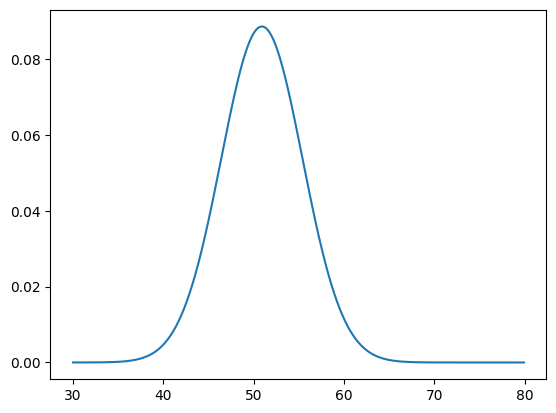

In [12]:
# Obtaining/plotting a gaussian distribution using scipy

import matplotlib.pyplot as plt
from scipy.optimize import minimize
import numpy as np
import pandas as pd
import scipy.stats

dx = 0.1 # We'll keep this value for later code cells
xrange = np.arange(30, 80, dx) # We'll keep this array for later
gauss = scipy.stats.norm.pdf(xrange, loc=50.9, scale=4.5)
plt.plot(xrange, gauss);


#### The values of a probability density function are not limited to $[0,1]$ 

(Rather, the **area** under the PDF is exactly $1$). 

In [13]:
scipy.stats.norm.pdf(1, loc=1, scale=0.1).max()


3.989422804014327

## Learning the class conditional Gaussians

$${ P_\theta(symptom_j \mid \text{Sleep Deprived = yes}) = \mathcal{N}(symptom_j \mid \,\,\mu_{j,\, \text{yes}},\,\sigma^2_{j,\, \text{yes}})}$$

#### Maximum likelihood estimation

$$\hat{\mu}_{j,\, \text{yes}} \leftarrow \text{ Mean of $symptom_j$ among data points with Sleep Deprived = yes} $$
$$\hat{\sigma}^2_{j,\, \text{yes}} \leftarrow \text{ Variance of $symptom_j$ among data points with Sleep Deprived = yes} $$

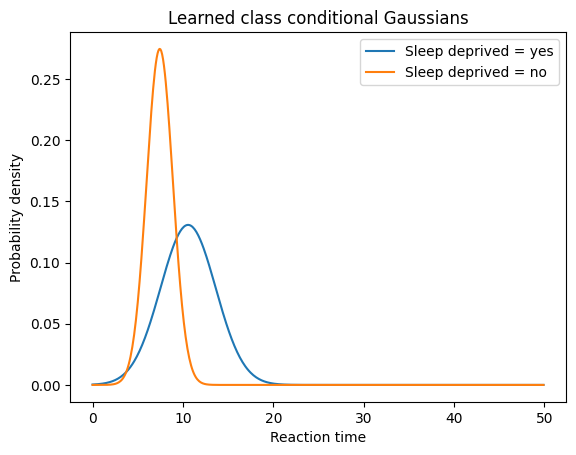

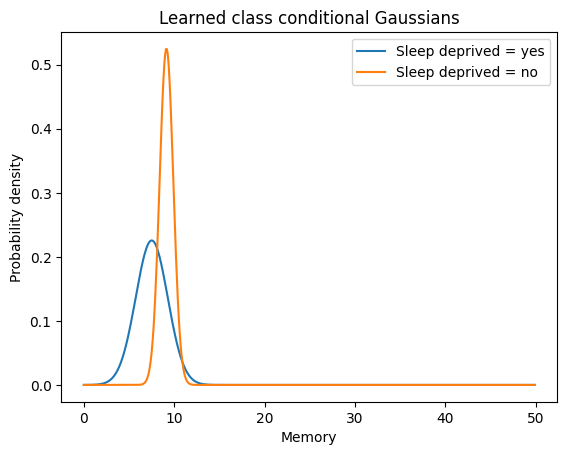

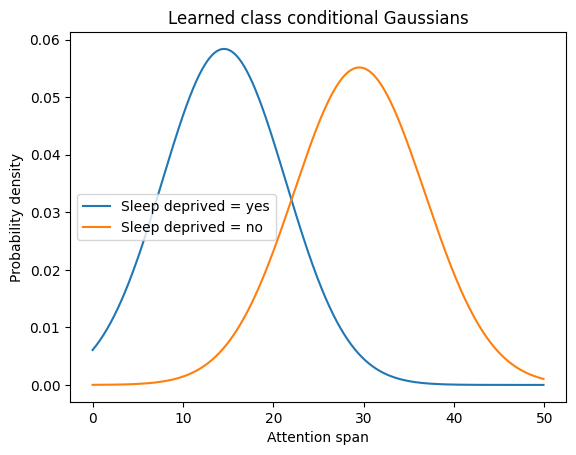

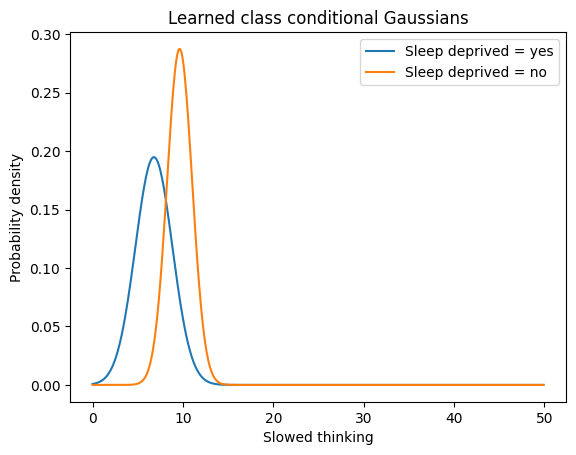

In [14]:
symptoms = ['Reaction time', 'Memory', 
            'Attention span', 'Slowed thinking']
xrange = np.arange(0, 50, dx)

mus_yes = []
sigs_yes = []

mus_no = []
sigs_no = []

idx_sr = sleep_dep_df['Sleep deprived?']
for symptom in symptoms:
    # calculate class-conditional mean and std deviation 
    mu_j_yes = sleep_dep_df[idx_sr == 1.0][symptom].mean()
    sig_j_yes = sleep_dep_df[idx_sr == 1.0][symptom].std()
    
    # store the estimates (we'll use them later)
    mus_yes.append(mu_j_yes)  
    sigs_yes.append(sig_j_yes)
    
    # calculate and plot class-conditional gaussian pdf
    gaussian_yes = scipy.stats.norm.pdf(xrange, 
                                        loc=mu_j_yes, 
                                        scale=sig_j_yes)
    plt.plot(xrange, gaussian_yes, label='Sleep deprived = yes')
    
    # calculate class-conditional mean and std deviation 
    mu_j_no = sleep_dep_df[idx_sr == 0.0][symptom].mean()
    sig_j_no = sleep_dep_df[idx_sr == 0.0][symptom].std()
    
    # store the estimates (we'll use them later)
    mus_no.append(mu_j_no)  # store the estimates 
                            # (we'll use them later)
    sigs_no.append(sig_j_no)
    
    # calculate and plot class-conditional gaussian pdf
    gaussian_no = scipy.stats.norm.pdf(xrange, 
                                       loc=mu_j_no, 
                                       scale=sig_j_no)
    plt.plot(xrange, gaussian_no, label='Sleep deprived = no')
    
    plt.xlabel(symptom)
    plt.ylabel('Probability density')
    plt.title('Learned class conditional Gaussians')
    
    plt.legend()
    plt.show();


### Compute the posterior 

* Note the use of the **independence** assumption (where?)
* Note the use of **marginalization** (where?) 

${ P_\theta(\text{Sleep Deprived = yes} \mid symptom_1, symptom_2, symptom_3, \dots) = }$

</br> 

$$
\frac{
\prod_j P_\theta(\text{symptom}_j \mid \text{Sleep Deprived=yes})\;
P_\theta(\text{Sleep Deprived=yes})
}{
\left(
\begin{aligned}
&\prod_j P_\theta(\text{symptom}_j \mid \text{Sleep Deprived=yes})\;
P_\theta(\text{Sleep Deprived=yes}) \\
&\quad+
\prod_j P_\theta(\text{symptom}_j \mid \text{Sleep Deprived=no})\;
P_\theta(\text{Sleep Deprived=no})
\end{aligned}
\right)
}
$$


### where the likelihood is a product of Gaussians:
$$\prod_j P_\theta(symptom_j \mid \text{Sleep Deprived = yes}) = \prod_j \mathcal{N}(symptom_j \mid \mu_{j,\,\text{yes}},\,\sigma^2_{j,\,\text{yes}})$$

### First attempt: directly calculate the posterior and test it

Given a score for each symptom we'll get the contribution to the likelihood from the relevant Gaussian above and multiply the lot: 

In [15]:
def sleep_dep_likelihoods(scrs):
    '''
    Input: a list or an array of scores: 
          [reaction time, memory, attention span, slowed thinking]
    Output: likelihoods for (Sleep Deprived=no) and likelihood for 
            (Sleep Deprived=yes) (in this order) given the scores.  
    '''
    likelihood_no, likelihood_yes = 1,1  
    for mu_j_no, sig_j_no, mu_j_yes, sig_j_yes, scr in zip(mus_no, 
                                                           sigs_no, 
                                                           mus_yes, 
                                                           sigs_yes, 
                                                           scrs): 
        likelihood_no *= scipy.stats.norm.pdf(scr, 
                                              loc=mu_j_no, 
                                              scale=sig_j_no)
        likelihood_yes *= scipy.stats.norm.pdf(scr, 
                                               loc=mu_j_yes, 
                                               scale=sig_j_yes)
    return likelihood_no, likelihood_yes

def sleep_dep_posteriors(likelihood_no, likelihood_yes, 
                         baserate_no=0.5, baserate_yes=0.5): 
    '''
    Input: likelihoods and base rates for (Sleep Deprived = yes) 
           and (Sleep Deprived = no)
    Output: Posterior of (Sleep Deprived = yes)
    '''
    numer = (likelihood_yes * baserate_yes)
    denom = (likelihood_yes * baserate_yes) + \
            (likelihood_no * baserate_no)
    return numer / denom

def gauss_nb_decide(scrs, baserate_no=0.5, baserate_yes=0.5):
    '''
    Self explanatory... 
    '''
    likelihood_no, likelihood_yes = sleep_dep_likelihoods(scrs)
    posterior_yes = sleep_dep_posteriors(likelihood_no, likelihood_yes)
    print('Posteriors that Sleep Deprived = yes: %f'%(posterior_yes))
    if posterior_yes < 0.5:
        print('Well rested\n')
    else: 
        print('Sleep deprived\n')
        
scores = [9, 10, 30, 12] 
gauss_nb_decide(scores)

scores = [12, 8, 18, 7]    
gauss_nb_decide(scores)


Posteriors that Sleep Deprived = yes: 0.002095
Well rested

Posteriors that Sleep Deprived = yes: 0.999035
Sleep deprived



#### Note (2): Beware of the Underfloat

Notice how small the likelihoods can get. 

It would be easy to run into [arithmetic underflow issues](https://en.wikipedia.org/wiki/Arithmetic_underflow).

What could be done to ameliorate the problem? 


In [16]:
def sleep_dep_log_likelihoods(scrs):
    '''
    Input: a list or an array of scores: 
           [reaction time, memory, attention span, slowed thinking]
    Output: log likelihood for (Sleep Deprived=no) and 
            log likelihood for (Sleep Deprived=yes) 
            (in this order) given the scores.  
    '''
    log_likelihood_no, log_likelihood_yes = 0, 0  
    for mu_j_no, sig_j_no, mu_j_yes, sig_j_yes, scr in zip(mus_no, 
                                                           sigs_no, 
                                                           mus_yes, 
                                                           sigs_yes, 
                                                           scrs): 
        log_likelihood_no += scipy.stats.norm.logpdf(scr, 
                                                     loc=mu_j_no, 
                                                     scale=sig_j_no)
        log_likelihood_yes += scipy.stats.norm.logpdf(scr, 
                                                      loc=mu_j_yes, 
                                                      scale=sig_j_yes)
    return log_likelihood_no, log_likelihood_yes

def sleep_dep_log_posterior_odds(log_likelihood_no, 
                                 log_likelihood_yes, 
                                 baserate_no=0.5, baserate_yes=0.5): 
    '''
    Input: likelihoods and base rates for (Sleep Deprived = no) 
           and (Sleep Deprived = yes)
    Output: Log posterior odds of (Sleep Deprived = yes)
    '''
    log_unnorm_posterior_no = log_likelihood_no+np.log(baserate_no)
    log_unnorm_posterior_yes = log_likelihood_yes+np.log(baserate_yes)
    return log_unnorm_posterior_yes - log_unnorm_posterior_no

def gauss_nb_decide(scrs, baserate_no=0.5, baserate_yes=0.5): 
    log_likelihood_no, log_likelihood_yes = \
                       sleep_dep_log_likelihoods(scrs)
    log_posterior_odds = \
            sleep_dep_log_posterior_odds(log_likelihood_no, 
                                         log_likelihood_yes, 
                                         baserate_no=baserate_no, 
                                         baserate_yes=baserate_yes)

    print('Log odds of Sleep Deprived = yes: %f'%log_posterior_odds)
    if log_posterior_odds < 0:
        print('Well rested\n')
    else: 
        print('Sleep deprived\n')
        
scores = [9, 10, 30, 12] 
gauss_nb_decide(scores)

scores = [12, 8, 18, 7]    
gauss_nb_decide(scores)


Log odds of Sleep Deprived = yes: -6.165938
Well rested

Log odds of Sleep Deprived = yes: 6.942325
Sleep deprived



### Implementing the *Gaussian* Naive Bayes Classifier with sklearn

#### Instead of the summary statistics, this would require the actual data (which we need to manufacture here). 



In [17]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB # <--- the model is 
                                           # implemented here

predictors = sleep_dep_df.columns[:-1]
outcome = sleep_dep_df.columns[-1]

###############################################
# Split data to training and testing datasets #
###############################################
X_train, X_test, y_train, y_test = \
    train_test_split(sleep_dep_df[predictors], 
                     sleep_dep_df[outcome], 
                     test_size=0.005) # tiny test set: one record

##############################################
# Initialize an instance of the model object #
##############################################
model = GaussianNB()

##########################################
# Train the model / fit model parameters #
##########################################
model.fit(X_train, y_train)

##################
# Test the model #
##################
print('Testing datapoint: ', X_test, 'Model prediction: ', 
      model.predict(X_test), '\n')



Testing datapoint:       Reaction time    Memory  Attention span  Slowed thinking
105      11.792963  7.534655       11.795272         8.072621 Model prediction:  [1.] 



## SPAM / HAM and the zero probability problem 

Ham refers to genuine and potentially informative mail. 

Spam is spurious and unsolicited mail with potential harmful intentions (or simply bothersome). 

A Naive Bayes classifier can distinguish between the two (to a certain degree) based on the words that make up the message. 

#### The available classified data 

(some wrangling required) 

In [18]:
spam_df = pd.read_csv('../Data/spam.csv')

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 606-607: invalid continuation byte

The `UnicodeDecodeError: ‘utf-8’ codec can’t decode bytes in position 0-1: invalid continuation byte error` is a common error that occurs when trying to read a file with Pandas that contains **non-UTF-8** encoded characters. 

UTF-8 is a character encoding standard that’s widely used for text files, but it’s not the only encoding format out there...

If known, you can specify the encoding format. A common one (that the file may well be encoded in) is ISO-8859-1:


In [19]:
spam_df = pd.read_csv('../Data/spam.csv', encoding='ISO-8859-1')

If that does not work, libraries such as `codecs` or `chardet` can help with figuring out the encoding and/or reading the file. 

In [20]:
spam_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [21]:
###########################
#   Rudimentary Clean up  #
# (much more can be done) #
###########################
spam_df = pd.read_csv('../Data/spam.csv', encoding='ISO-8859-1')
spam_df = spam_df[['v1', 'v2']].rename(columns={'v1': 'Class', 'v2': 'Text'})

spam_df['Text'] = \
  spam_df['Text'].apply(lambda x: x.replace('.',' ').replace(',', ' '))
spam_df['Text'] = \
  spam_df['Text'].apply(lambda x: x.replace(':',' ').replace(';', ' '))
spam_df['Text'] = \
  spam_df['Text'].apply(lambda x: x.replace('?',' ').replace('!', ' ')) # are these pertinent? 
spam_df['Text'] = \
  spam_df['Text'].apply(lambda x: x.replace('(',' ').replace(')', ' '))
spam_df['Text'] = \
  spam_df['Text'].apply(lambda x: x.replace('"',' ').replace('/', ' '))
spam_df['Text'] = spam_df['Text'].apply(lambda x: x.lower())

# class imbalance is an issue
num_ham = len(spam_df[spam_df['Class'] == 'ham'])
num_spam = len(spam_df[spam_df['Class'] == 'spam'])              
print('N. of hams %d;  No. of spams: %d.'%(num_ham, num_spam)) 

spam_df.head()



N. of hams 4825;  No. of spams: 747.


,Class,Text
0,ham,go until jurong point crazy available only ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i don't think he goes to usf he lives aro...


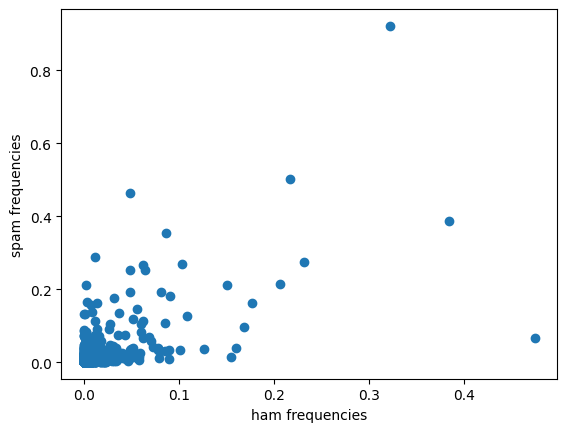

In [22]:
def count_words(srs): 
    '''
    Input: a Pandas Series (a column from a DataFrame) with strings of 
           space separated words in every cell 
    Output: A dictionary with the total word count for every word
    '''
    word_counts = {}
    for text in srs:
        words = text.split()
        for word in words:
            if word in word_counts.keys(): 
                word_counts[word] += 1
            else:
                word_counts[word] = 1 
    return(word_counts)

ham_count_dict = \
    count_words(spam_df[spam_df['Class'] == 'ham']['Text'])
spam_count_dict = \
     count_words(spam_df[spam_df['Class'] == 'spam']['Text'])
intersection_dict = \
    {k:(ham_count_dict[k]/num_ham, spam_count_dict[k]/num_spam) 
       for k in ham_count_dict 
       if k in spam_count_dict}

x = [v[0] for v in intersection_dict.values()] # ham count
y = [v[1] for v in intersection_dict.values()] # spam count
plt.scatter(x, y)
plt.xlabel('ham frequencies')
plt.ylabel('spam frequencies'); 


#### Not the greatest plot... 

How do we improve it? 

</br> 

</br> 

</br> 

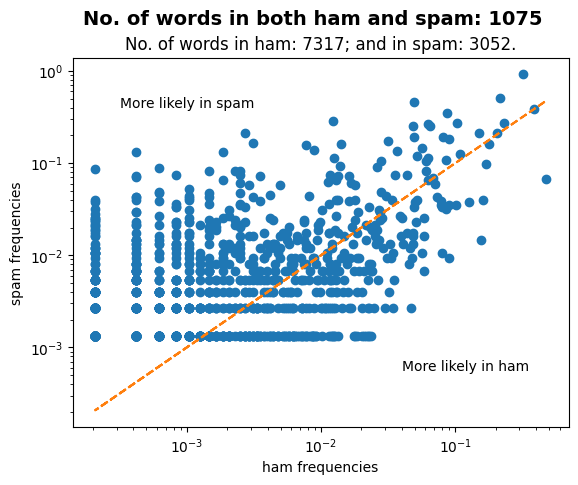

In [23]:
plt.scatter(x, y)
plt.plot(x, x, linestyle='dashed', color='C1')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('ham frequencies')
plt.ylabel('spam frequencies') 
plt.text(10**(-1.4), 10**(-3.25), 'More likely in ham')
plt.text(10**(-3.5), 10**(-0.4), 'More likely in spam')

N_ham = len(ham_count_dict)
N_spam = len(spam_count_dict)
N_both = len(intersection_dict)
plt.suptitle('No. of words in both ham and spam: %d'%N_both, 
             fontsize=14, fontweight="bold",)
plt.title('No. of words in ham: %d; and in spam: %d.'%(N_ham,
                                                          N_spam));


#### What do we see? 

* Some words are more likely in spams and some are less. 
* Only $\sim 1,000$ words were found both in ham and in spam as compared to $\sim 7,000$ and $3,000$ in the individual classes.  


### The Zero Probability Problem 

A disadvantage of Naive-Bayes is that in the absence of occurrences of a certain attribute value (e.g., a word) in a class (e.g., in ham or in spam), the frequency-based probability estimate will be zero. 

If multiplied by the other probabilities it will zero the product: 

${ P(\text{spam} | word_1, word_2, word_3, \dots) = } 
{\large 
\frac{\overbrace{P(word_1 | \text{spam})P(word_2 | \text{spam})P(word_3 | \text{spam})}^{\text{Prob. of independent words given spam}} \ \ P(\text{spam}) }{P(word_1) P(word_2) P(word_3) \dots}}$

</br> 

</br> 

$\sim \underbrace{P(word_1 | \text{spam})}_{\text{conditional Probability}_1}
      \overbrace{\color{red} P(word_2 | \text{spam})}^{\text{conditional Probability}_2 = {\color{red} 0}}
      \underbrace{P(word_3 | \text{spam})}_{\text{conditional Probability}_3} \ \       
      \overbrace{P(\text{spam})}^{\text{Class Probability}} = \color{red} 0$

</br>

</br> 






#### How about just ignoring words that do not appear in the class and only using the ones that do? 

${\small P(\text{spam} | word_1, word_2, \dots) \sim P(word_1 | \text{spam}) \color{red} P(word_2 | \text{spam})P(word_3 | \text{spam}) \ \ P(\text{spam})}$

${\small P(\text{ham} | word_1, word_2, \dots) \sim P(word_1 | \text{ham}) \color{red} P(word_2 | \text{ham})P(word_3 | \text{ham}) \ \ P(\text{ham})}$



</br>


</br>


</br>



* If both $\color{red} P(word_2 | \text{spam})=0$ and $\color{red} P(word_2 | \text{ham})\neq 0$ then information is thrown away! Finding $word_2$, which is **never** found in spam, should increase the relative likelihood that the message in question is ham. Perhaps by a significant amount. 

* Removing only $\color{red} P(word_2 | \text{spam})$ is even worse. Since probabilities are smaller than $1$, replacing a probability with $1$ in the product only increases the relative likelihood of spam. This clearly does not make sense.  



#### What else can be done? 


</br>


</br>


</br>


</br>


</br>


</br>


</br>


### One possible solution: Additive Smoothing 

* Add $1$  to the count for every combination of attribute value and class, e.g., to every word count in spam and to every word count in ham. Popular and unpopular words will keep their popularity rank, probabilities won't change much for high enough counts, e.g., $10/3000 \simeq 11/3001$, and there will be no zero counts anywhere. This is sometimes referred to as a **'Laplace Transformation'**.

</br> 

* Add a smaller positive number ($0< \delta <1$) to 'penalize'/'boost' the relative likelihood even more. [See here](https://www-labs.iro.umontreal.ca/~felipe/IFT6010-Hiver2015/resources-2011/Articles/chen98.pdf). 

</br> 

* Good-Turing estimate: $ count_i \rightarrow \left(count_i+1 \right) { \frac{\text{No. of words that appeared } count_i \text{ times}}{\text{No. of words that appeared } count_i+1 \text{ times}}}$. [See here](https://www-labs.iro.umontreal.ca/~felipe/IFT6010-Hiver2015/resources-2011/Articles/chen98.pdf).

</br> 

* Sometimes it is possible to replace the zero probabilities with estimates. E.g., guess the frequency of absent words on the basis of another dataset. This is more cumbersome and [does not always yield better results](https://link.springer.com/article/10.3758/s13428-012-0270-5). 

### Tokenizing the words and counting them with the `nltk` library

In [29]:
import nltk
# nltk.download("punkt")       # had to download these resources
# nltk.download('punkt_tab')   # first time around
import pandas as pd 
from itertools import islice

###########################
#   Rudimentary Clean up  #
# (much more can be done) #
###########################
ham_spam_df = pd.read_csv('../Data/spam.csv', encoding='ISO-8859-1')
ham_spam_df = ham_spam_df[['v1', 'v2']].rename(columns={'v1': 'Class', 'v2': 'Text'})

ham_spam_df['Text'] = ham_spam_df['Text'].apply(lambda x: x.replace('.',' ').replace(',', ' '))
ham_spam_df['Text'] = ham_spam_df['Text'].apply(lambda x: x.replace(':',' ').replace(';', ' '))
ham_spam_df['Text'] = ham_spam_df['Text'].apply(lambda x: x.replace('?',' ').replace('!', ' ')) # are these pertinent? 
ham_spam_df['Text'] = ham_spam_df['Text'].apply(lambda x: x.replace('(',' ').replace(')', ' '))
ham_spam_df['Text'] = ham_spam_df['Text'].apply(lambda x: x.replace('"',' ').replace('/', ' '))
ham_spam_df['Text'] = ham_spam_df['Text'].apply(lambda x: x.lower())

def tokenize_ham_spam(df, clss): 
    '''
    Input: a dataframe with the spam.csv data (cleaned up) and 
           the required class ('ham' or 'spam'). 
    Output: a ham or spam dataframes, a ham or spam token list, and 
            a ham or spam frequency distribution object
    '''
    clss_df = df[df.Class == clss]
    clss_tok = nltk.word_tokenize(clss_df.Text.sum()) # token object
    clss_freq_dist_obj = nltk.probability.FreqDist(clss_tok) # frequency distribution object, behaves like a dictionary
    return(clss_df, clss_tok, clss_freq_dist_obj)
    
    
    
ham_df,  ham_tok,  ham_freqs = tokenize_ham_spam(ham_spam_df, 'ham')
spam_df, spam_tok, spam_freqs = tokenize_ham_spam(ham_spam_df, 'spam')

# See https://www.nltk.org/api/nltk.probability.FreqDist.html for more functions
print( list(islice(ham_freqs.items(), 10)) )
print( "The total number of words is %d."%ham_freqs.N() )
print( "'Joking' apppears a fraction %.2e of all words."%(ham_freqs.freq('joking')) ) 
print( "'Joking' appears %d times."%(ham_freqs.N() * ham_freqs.freq('joking')) ) 


[('go', 246), ('until', 21), ('jurong', 1), ('point', 11), ('crazy', 9), ('available', 15), ('only', 130), ('in', 808), ('bugis', 7), ('n', 139)]
The total number of words is 70635.
'Joking' apppears a fraction 7.08e-05 of all words.
'Joking' appears 5 times.


In [30]:
def ham_spam_log_likelihoods(f_ham, f_spam):
    '''
    Input: a list or an array of frequencies of words
    Output: likelihoods for being well rested and likelihood for being sleep deprived 
            (in this order) given the scores.  
    '''
    return(sum(f_ham), sum(f_spam))

def ham_spam_log_posteriors(log_likelihoods_ham_spam): 
    '''
    Input: a tuple of likelihoods from sleep_dep_likelihoods(). 
    Output: respective posteriors. 
    This is not strictly necessary since the class probabilities are constant - 
    it is only added for the sake of clarity. 
    '''
    return(log_likelihoods_ham_spam[0]+log_class_prob_ham, 
           log_likelihoods_ham_spam[1]+log_class_prob_spam)

def ham_spam_decide(f_ham, f_spam): 
    log_post_ham, log_post_spam = ham_spam_log_posteriors(ham_spam_log_likelihoods(f_ham, f_spam))
    print('Unnormalized log posteriors for ham & spam: %f and %f, respectively'%(log_post_ham, log_post_spam))
    if log_post_ham > log_post_spam:
        print('ham')
    else: 
        print('spam')
        
# Testing the code with completely made up numbers:         
log_class_prob_ham, log_class_prob_spam = np.log(0.5), np.log(0.5) 
counts_h, counts_s = np.random.randint(1,50, 20), np.random.randint(1,50, 20)
N_h, N_s = np.random.randint(1,10000, 20), np.random.randint(1,10000, 20)
ham_spam_decide(counts_h/N_h, counts_s/N_s)
 

Unnormalized log posteriors for ham & spam: -0.457931 and 17.647074, respectively
spam


#### Note: 

  1. The code above does **not** deal with the zero-frequency problem. </br> 
  2. In the code above, the prior was not seriously considered.  
  2. Implementing the classifier using the `nltk` library would take a little digging. </br>
     `nltk` is very useful for serious applications but it would be simpler to write a toy implementation without it. 
 